## Author Name: MUBIN AHMAD TOKHI
## Project: Amazon Products Analysis
## Goals of Project:



In this comprehensive project, our primary objective was to gain actionable insights into our product offerings, customer base, and overall market positioning. The key areas of focus encompassed:


Sales Analysis:
We delved into understanding which products are dominating our sales figures. By meticulously analyzing sales data, we aimed to identify the top-performing produnue.

Product Recommendations:
Leveraging the sales insights, we determined optimal product recommendations for our customers. This strategic approach not only enhances customer satisfaction but also maximizes cross-selling opptrtunind needs.

Product Reviews Analysis:
A comprehensive examination of product reviews was conducted to identify areas of improvement. Products with negative reviews and lower purchase rates were flagged for further investigation, allowing us to make informed decisions about inventory management.

User Segmentation:
The project involved segregating users into frequent and non-frequent categories based on their purchasing behavior. This segmentation enabled us to pinpoint customers who are more likely to make repeated purchases, allowing us to offer targeted discounts or coupons to enhance customer loyalty.

Discount and Coupon Strategy:
By analyzing frequent users, we developed a data-driven strategy to offer discounts or coupons to those customers who contribute significantly to our sales. This personalized approach aims to foster customer loyalty and satisfaction.

Sentiment Analysis:
The sentiment analysis component focused on understanding the emotions and attitudes expressed in product-related content. This information is invaluable for gauging customer satisfaction and refining our products and services.

Outcome:
This project culminated in a holistic understanding of our product landscape, customer behaviors, and market dynamics. The insights derived from this analysis empower us to make informed decisions that optimize our product inventory, refine advertising strategies, and enhance overall customer satisfaction.


----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## READING SQL DATA

**First We need to create a connection for the database by importing sqlite3 library in pythons.**

In [2]:
con = sqlite3.connect(r"C:\Users\mobin\DATASIENCE\DATA ANALYTICS PROJECTS\Amazon\database.sqlite")

In [3]:
df = pd.read_sql_query('Select * From Reviews' , con)

In [4]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


## PREPPARING DATA FOR THE ANALYSIS

_____

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [7]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [10]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [11]:
df_valid.shape

(568452, 10)

In [12]:
df_valid.duplicated(['UserId','ProfileName' , 'Time' , 'Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [13]:
df_valid[df_valid.duplicated(['UserId','ProfileName' , 'Time' , 'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [14]:
clean_data = df_valid.drop_duplicates(['UserId','ProfileName' , 'Time' , 'Text'])

In [15]:
clean_data.shape

(393931, 10)

In [16]:
clean_data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [17]:
clean_data['Time'] = pd.to_datetime(clean_data['Time'] , unit = 's')

C:\Users\mobin\AppData\Local\Temp\ipykernel_25784\54614275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Time'] = pd.to_datetime(clean_data['Time'] , unit = 's')


## Analysing products recommendation for a User

**Now we are working on a recommandation for our users, for implementing these we have to take a look at our users and their purchases.**
**Our analysis are based on UserID as it is unique and their can not be any other UserID that matches someone else's.**

----

In [18]:
clean_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [19]:
clean_data['ProfileName'].nunique()

218418

In [20]:
clean_data['UserId'].nunique()

256059

In [21]:
recomend_data = clean_data.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by ='ProductId' , ascending = False)

In [22]:
recomend_data.head()

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


In [23]:
recomend_data['ProductId'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

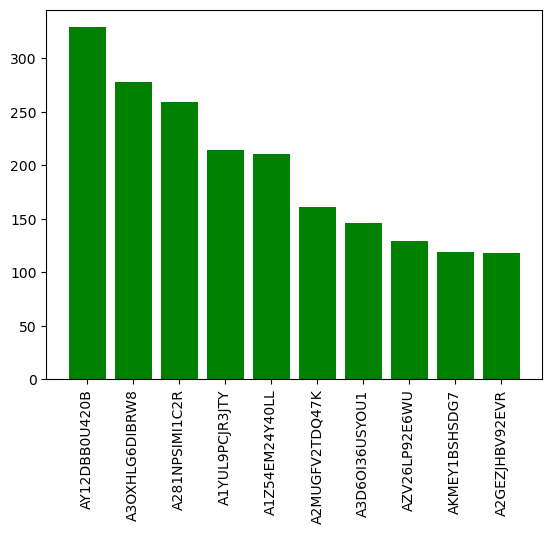

In [24]:
plt.bar( recomend_data.index[0:10] , recomend_data['ProductId'][0:10].values , color = 'g')
plt.xticks(rotation = 'vertical')

## FINDING WHICH PRODUCT HAS A GOOD REVIEWS

In [25]:
clean_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [26]:
good_rws = clean_data['ProductId'].value_counts().to_frame()

In [27]:
good_rws[good_rws['count'] >= 500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [28]:
freq_index = good_rws[good_rws['count'] >= 500].index

In [29]:
freq_index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [30]:
clean_data['ProductId'].isin(freq_index)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [31]:
freq_data = clean_data[clean_data['ProductId'].isin(freq_index)]

In [32]:
freq_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...


<Axes: xlabel='count', ylabel='ProductId'>

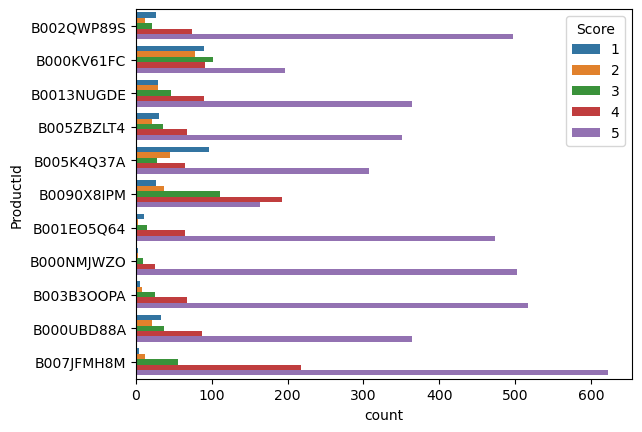

In [33]:
sns.countplot(data = freq_data , y = 'ProductId' , hue = 'Score')

----

## FINDING THE DIFFERENCE BETWEEN FREQUENT VIEWERS AND NON FREQUENT VIWERS

**If a customer has purchased a product more than 50 times we are considering the customer as frequent viewer, if not customer is not a frequent user.**

----

In [34]:
clean_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [86]:
x = clean_data['UserId'].value_counts()

In [88]:
clean_data['User Type'] = clean_data['UserId'].apply(lambda user: 'Frquent' if x[user]>=50 else 'Non Frequent')

C:\Users\mobin\AppData\Local\Temp\ipykernel_25784\4272970230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['User Type'] = clean_data['UserId'].apply(lambda user: 'Frquent' if x[user]>=50 else 'Non Frequent')


In [89]:
clean_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,User Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Non Frequent


In [94]:
freq_users = clean_data[clean_data['User Type'] == 'Frquent']
non_freq_users = clean_data[clean_data['User Type'] == 'Non Frequent']

In [106]:
freq_users.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,User Type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frquent


In [107]:
non_freq_users.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,User Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent


In [110]:
freq_users['Score'].value_counts()

Score
5    5813
4    2000
3     915
2     374
1     356
Name: count, dtype: int64

In [111]:
non_freq_users['Score'].value_counts()

Score
5    245148
4     54093
1     35950
3     28854
2     20428
Name: count, dtype: int64

<BarContainer object of 5 artists>

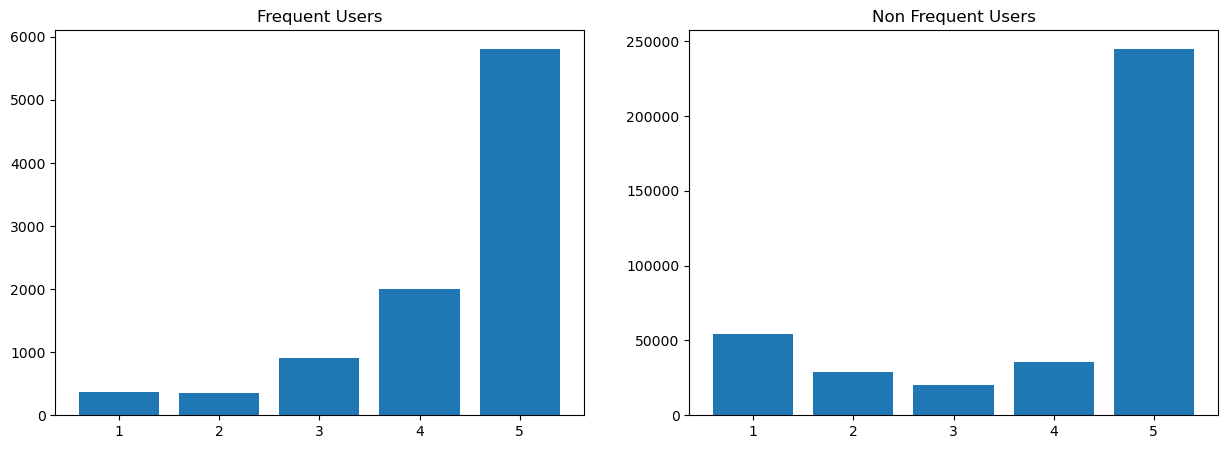

In [122]:
fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 5))
ax[0].set_title('Frequent Users')
ax[1].set_title('Non Frequent Users')
ax[0].bar(freq_users['Score'].unique() , freq_users['Score'].value_counts())
ax[1].bar(non_freq_users['Score'].unique() , non_freq_users['Score'].value_counts())

## SENITEMENT ANALYSIS OF CUSTOMERS

In [124]:
clean_data.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,User Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent


In [123]:
from textblob import TextBlob

In [126]:
TextBlob(clean_data['Summary'][0]).sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [127]:
clean_data.shape

(393931, 11)

In [128]:
sample = clean_data[0:100000]

In [129]:
polarity_list = []
for text in sample['Summary']:
    try:
        polarity_list.append(TextBlob(text).sentiment.polarity)
    except:
        polarity_list.append(0)

In [130]:
len(polarity_list)

100000

In [131]:
sample['Polarity'] = polarity_list

C:\Users\mobin\AppData\Local\Temp\ipykernel_25784\3249325156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Polarity'] = polarity_list


In [132]:
sample.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,User Type,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Non Frequent,0.7


In [139]:
positive_customers = sample[sample['Polarity'] > 0]

In [142]:
from collections import Counter
from wordcloud import WordCloud , STOPWORDS

In [141]:
Counter(positive_customers['Summary']).most_common(10)

[('Delicious!', 438),
 ('Delicious', 407),
 ('Great product', 199),
 ('Excellent', 176),
 ('Great Product', 154),
 ('Love it!', 153),
 ('Great', 144),
 ('Great!', 120),
 ('Awesome', 106),
 ('Great Coffee', 101)]

In [144]:
Total_positive_coomments = ' '.join(sample['Summary'])

In [146]:
Total_positive_coomments

'Good Quality Dog Food Not as Advertised "Delight" says it all Cough Medicine Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Yay Barley Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Strawberry Twizzlers - Yummy Lots of twizzlers, just what you expect. poor taste Love it! GREAT SWEET CANDY! Home delivered twizlers Always fresh TWIZZLERS Delicious product! Twizzlers Please sell these in Mexico!! Twizzlers - Strawberry Nasty No flavor Great Bargain for the Price YUMMY! Great machine! THIS IS MY TASTE... Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! it\'s oatmeal GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Oatmeal For Oatmeal Lovers Food-Great Good Hot Breakfast Great taste and conven

In [154]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(Total_positive_coomments)

(-0.5, 399.5, 199.5, -0.5)

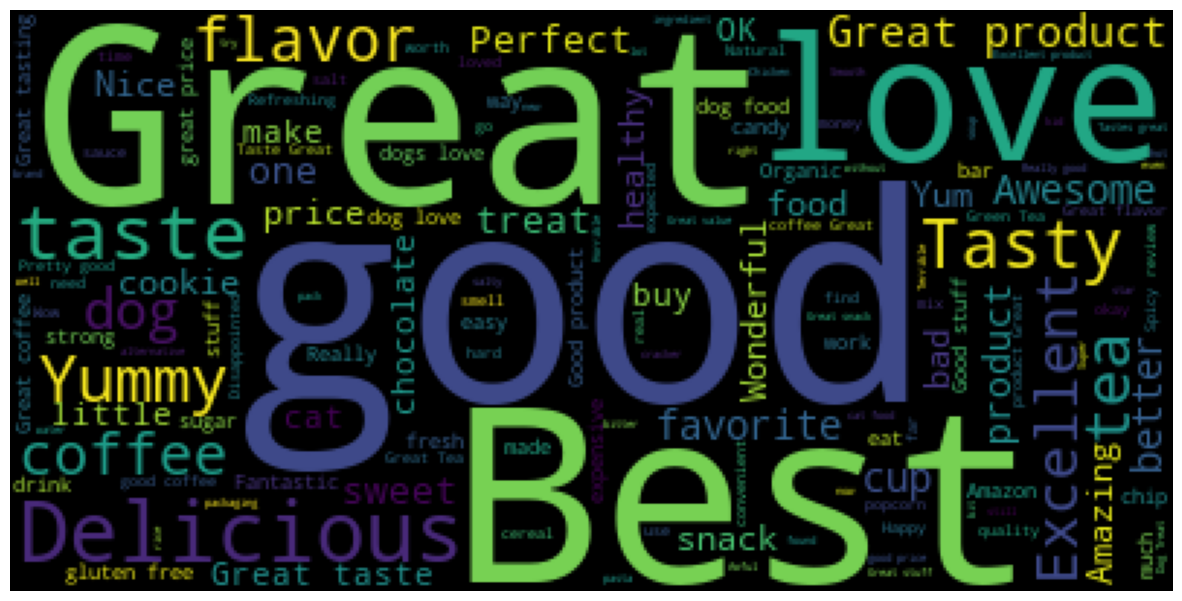

In [150]:
plt.figure(figsize = (15,12))
plt.imshow(wordcloud)
plt.axis('off')